In [1]:
import numpy as np
import os
import math
from google.colab import drive
import datetime
drive.mount('/content/drive')

path = "/content/drive/My Drive"
os.chdir("/content/drive/My Drive/Colab Notebooks/MSBD5001/Kaggle Competition")
print(os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/MSBD5001/Kaggle Competition


In [2]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MSBD5001/Kaggle Competition/data/train.csv")
print(data)

          id              date      speed
0          0     1/1/2017 0:00  43.002930
1          1     1/1/2017 1:00  46.118696
2          2     1/1/2017 2:00  44.294158
3          3     1/1/2017 3:00  41.067468
4          4     1/1/2017 4:00  46.448653
...      ...               ...        ...
14001  14001  31/12/2018 12:00  19.865269
14002  14002  31/12/2018 15:00  17.820375
14003  14003  31/12/2018 16:00  12.501851
14004  14004  31/12/2018 18:00  15.979319
14005  14005  31/12/2018 20:00  40.594183

[14006 rows x 3 columns]


In [3]:
data['date']=pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

In [4]:
data["date_weekday"] = data['date'].dt.weekday

In [5]:
data.head()

,id,date,speed,date_weekday
0,0,2017-01-01 00:00:00,43.002930,6
1,1,2017-01-01 01:00:00,46.118696,6
2,2,2017-01-01 02:00:00,44.294158,6
3,3,2017-01-01 03:00:00,41.067468,6
4,4,2017-01-01 04:00:00,46.448653,6


In [6]:
def extract_date(df,column):
  df[column+"_year"] = df[column].apply(lambda x:x.year)
  df[column+"_month"] = df[column].apply(lambda x:x.month)
  df[column+"_day"] = df[column].apply(lambda x:x.day)
  df[column+"_hour"] = df[column].apply(lambda x:x.hour)
  df[column+"_isSunday"] = df['date_weekday'].apply(lambda x:1 if (x == 6) else 0)
  df[column+"_isSaturday"] = df['date_weekday'].apply(lambda x:1 if (x == 5) else 0)
  df[column+"_isWorkingday"] = df['date_weekday'].apply(lambda x:1 if (x >= 0 and x <=4) else 0)
  df[column+"_isBusy"] = df['date_hour'].apply(lambda x:1 if(x == 18 or x == 17) else 0)
  df[column+"_isMorning"] = df['date_hour'].apply(lambda x:1 if(x>=8 and x<=19) else 0)
  df[column+"_isNight"] = df['date_hour'].apply(lambda x:1 if(x>=20 or x<=7) else 0)
  df[column+"_isSpring"] = df['date_month'].apply(lambda x:1 if(x>=3 and x<=5) else 0)
  df[column+"_isSummer"] = df['date_month'].apply(lambda x:1 if(x>=6 and x<=8) else 0)
  df[column+"_isAutumn"] = df['date_month'].apply(lambda x:1 if(x>=9 and x<=11) else 0)
  df[column+"_isWinter"] = df['date_month'].apply(lambda x:1 if(x>=12 or x<=2) else 0)
  df[column+"_isAtEarly"] = df['date_day'].apply(lambda x:1 if(x>=1 and x<=10) else 0)
  df[column+"_isAtMiddle"] = df['date_day'].apply(lambda x:1 if(x>=11 and x<=20) else 0)
  df[column+"_isAtTheEnd"] = df['date_day'].apply(lambda x:1 if(x>=21 and x<=31) else 0)

In [7]:
extract_date(data,'date')
data['speed_for_last_1_hour'] = data['speed'].shift(1)
data['speed_for_last_1_hour'] = data['speed_for_last_1_hour'].fillna(43)
data['speed_for_last_2_hour'] = data['speed'].shift(2)
data['speed_for_last_2_hour'] = data['speed_for_last_2_hour'].fillna(43)
data['speed_for_last_3_hour'] = data['speed'].shift(3)
data['speed_for_last_3_hour'] = data['speed_for_last_3_hour'].fillna(43)
data['speed_for_last_4_hour'] = data['speed'].shift(4)
data['speed_for_last_4_hour'] = data['speed_for_last_4_hour'].fillna(43)
data['speed_for_last_5_hour'] = data['speed'].shift(5)
data['speed_for_last_5_hour'] = data['speed_for_last_5_hour'].fillna(43)
data['speed_for_last_6_hour'] = data['speed'].shift(6)
data['speed_for_last_6_hour'] = data['speed_for_last_6_hour'].fillna(43)
data['speed_for_last_7_hour'] = data['speed'].shift(7)
data['speed_for_last_7_hour'] = data['speed_for_last_7_hour'].fillna(43)
data['speed_for_last_8_hour'] = data['speed'].shift(8)
data['speed_for_last_8_hour'] = data['speed_for_last_8_hour'].fillna(43)
data['speed_for_last_9_hour'] = data['speed'].shift(9)
data['speed_for_last_9_hour'] = data['speed_for_last_9_hour'].fillna(43)
data['speed_for_last_10_hour'] = data['speed'].shift(10)
data['speed_for_last_10_hour'] = data['speed_for_last_10_hour'].fillna(43)
data['speed_for_last_11_hour'] = data['speed'].shift(11)
data['speed_for_last_11_hour'] = data['speed_for_last_11_hour'].fillna(43)
data['speed_for_last_12_hour'] = data['speed'].shift(12)
data['speed_for_last_12_hour'] = data['speed_for_last_12_hour'].fillna(43)
data['speed_for_last_13_hour'] = data['speed'].shift(13)
data['speed_for_last_13_hour'] = data['speed_for_last_13_hour'].fillna(43)
data['speed_for_last_14_hour'] = data['speed'].shift(14)
data['speed_for_last_14_hour'] = data['speed_for_last_14_hour'].fillna(43)
data['speed_for_last_15_hour'] = data['speed'].shift(15)
data['speed_for_last_15_hour'] = data['speed_for_last_15_hour'].fillna(43)
data['speed_for_last_16_hour'] = data['speed'].shift(16)
data['speed_for_last_16_hour'] = data['speed_for_last_16_hour'].fillna(43)
data['speed_for_last_17_hour'] = data['speed'].shift(17)
data['speed_for_last_17_hour'] = data['speed_for_last_17_hour'].fillna(43)
data['speed_for_last_18_hour'] = data['speed'].shift(18)
data['speed_for_last_18_hour'] = data['speed_for_last_18_hour'].fillna(43)
data['speed_for_last_19_hour'] = data['speed'].shift(19)
data['speed_for_last_19_hour'] = data['speed_for_last_19_hour'].fillna(43)
data['speed_for_last_20_hour'] = data['speed'].shift(20)
data['speed_for_last_20_hour'] = data['speed_for_last_20_hour'].fillna(43)
data['speed_for_last_21_hour'] = data['speed'].shift(21)
data['speed_for_last_21_hour'] = data['speed_for_last_21_hour'].fillna(43)
data['speed_for_last_22_hour'] = data['speed'].shift(22)
data['speed_for_last_22_hour'] = data['speed_for_last_22_hour'].fillna(43)
data['speed_for_last_23_hour'] = data['speed'].shift(23)
data['speed_for_last_23_hour'] = data['speed_for_last_23_hour'].fillna(43)
data['speed_for_last_24_hour'] = data['speed'].shift(24)
data['speed_for_last_24_hour'] = data['speed_for_last_24_hour'].fillna(43)

In [8]:
data.head()

,id,date,speed,date_weekday,date_year,date_month,date_day,date_hour,date_isSunday,date_isSaturday,date_isWorkingday,date_isBusy,date_isMorning,date_isNight,date_isSpring,date_isSummer,date_isAutumn,date_isWinter,date_isAtEarly,date_isAtMiddle,date_isAtTheEnd,speed_for_last_1_hour,speed_for_last_2_hour,speed_for_last_3_hour,speed_for_last_4_hour,speed_for_last_5_hour,speed_for_last_6_hour,speed_for_last_7_hour,speed_for_last_8_hour,speed_for_last_9_hour,speed_for_last_10_hour,speed_for_last_11_hour,speed_for_last_12_hour,speed_for_last_13_hour,speed_for_last_14_hour,speed_for_last_15_hour,speed_for_last_16_hour,speed_for_last_17_hour,speed_for_last_18_hour,speed_for_last_19_hour,speed_for_last_20_hour,speed_for_last_21_hour,speed_for_last_22_hour,speed_for_last_23_hour,speed_for_last_24_hour
0,0,2017-01-01 00:00:00,43.002930,6,2017,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,43.000000,43.000000,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
1,1,2017-01-01 01:00:00,46.118696,6,2017,1,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,43.002930,43.000000,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
2,2,2017-01-01 02:00:00,44.294158,6,2017,1,1,2,1,0,0,0,0,1,0,0,0,1,1,0,0,46.118696,43.002930,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
3,3,2017-01-01 03:00:00,41.067468,6,2017,1,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,44.294158,46.118696,43.002930,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
4,4,2017-01-01 04:00:00,46.448653,6,2017,1,1,4,1,0,0,0,0,1,0,0,0,1,1,0,0,41.067468,44.294158,46.118696,43.00293,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0


In [9]:
import requests
from bs4 import BeautifulSoup

def get_hk_public_holiday(in_year):

    url = 'https://www.gov.hk/en/about/abouthk/holiday/'+str(in_year)+'.htm'
    page = requests.get(url)

    from bs4 import BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')

    table = soup.find_all('table')
    df = pd.read_html(str(table))[0]

    df[1] = df[1] + " " +str(in_year)

    return pd.to_datetime(df[1], dayfirst=True)[1:]

In [10]:
hk_holiday_2018 = list(get_hk_public_holiday(2018))
hk_holiday_2017 = list(get_hk_public_holiday(2017))

In [11]:
print(hk_holiday_2018)
print(hk_holiday_2017)

[Timestamp('2018-01-01 00:00:00'), Timestamp('2018-02-16 00:00:00'), Timestamp('2018-02-17 00:00:00'), Timestamp('2018-02-19 00:00:00'), Timestamp('2018-03-30 00:00:00'), Timestamp('2018-03-31 00:00:00'), Timestamp('2018-04-02 00:00:00'), Timestamp('2018-04-05 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2018-05-22 00:00:00'), Timestamp('2018-06-18 00:00:00'), Timestamp('2018-07-02 00:00:00'), Timestamp('2018-09-25 00:00:00'), Timestamp('2018-10-01 00:00:00'), Timestamp('2018-10-17 00:00:00'), Timestamp('2018-12-25 00:00:00'), Timestamp('2018-12-26 00:00:00')]
[Timestamp('2017-01-02 00:00:00'), Timestamp('2017-01-28 00:00:00'), Timestamp('2017-01-30 00:00:00'), Timestamp('2017-01-31 00:00:00'), Timestamp('2017-04-04 00:00:00'), Timestamp('2017-04-14 00:00:00'), Timestamp('2017-04-15 00:00:00'), Timestamp('2017-04-17 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2017-05-03 00:00:00'), Timestamp('2017-05-30 00:00:00'), Timestamp('2017-07-01 00:00:00'), Timestamp('2

In [12]:
data['date_isHoliday'] = data['date'].apply(lambda x:1 if((x.date() in hk_holiday_2017) or (x.date() in hk_holiday_2018)) else 0)

In [13]:
data.loc[(data['date_month'] == 1) & (data['date_day'] == 1)]

,id,date,speed,date_weekday,date_year,date_month,date_day,date_hour,date_isSunday,date_isSaturday,date_isWorkingday,date_isBusy,date_isMorning,date_isNight,date_isSpring,date_isSummer,date_isAutumn,date_isWinter,date_isAtEarly,date_isAtMiddle,date_isAtTheEnd,speed_for_last_1_hour,speed_for_last_2_hour,speed_for_last_3_hour,speed_for_last_4_hour,speed_for_last_5_hour,speed_for_last_6_hour,speed_for_last_7_hour,speed_for_last_8_hour,speed_for_last_9_hour,speed_for_last_10_hour,speed_for_last_11_hour,speed_for_last_12_hour,speed_for_last_13_hour,speed_for_last_14_hour,speed_for_last_15_hour,speed_for_last_16_hour,speed_for_last_17_hour,speed_for_last_18_hour,speed_for_last_19_hour,speed_for_last_20_hour,speed_for_last_21_hour,speed_for_last_22_hour,speed_for_last_23_hour,speed_for_last_24_hour,date_isHoliday
0,0,2017-01-01 00:00:00,43.002930,6,2017,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
1,1,2017-01-01 01:00:00,46.118696,6,2017,1,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
2,2,2017-01-01 02:00:00,44.294158,6,2017,1,1,2,1,0,0,0,0,1,0,0,0,1,1,0,0,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
3,3,2017-01-01 03:00:00,41.067468,6,2017,1,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
4,4,2017-01-01 04:00:00,46.448653,6,2017,1,1,4,1,0,0,0,0,1,0,0,0,1,1,0,0,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
5,5,2017-01-01 05:00:00,46.797766,6,2017,1,1,5,1,0,0,0,0,1,0,0,0,1,1,0,0,46.448653,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
6,6,2017-01-01 06:00:00,44.404925,6,2017,1,1,6,1,0,0,0,0,1,0,0,0,1,1,0,0,46.797766,46.448653,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
7,7,2017-01-01 07:00:00,45.255897,6,2017,1,1,7,1,0,0,0,0,1,0,0,0,1,1,0,0,44.404925,46.797766,46.448653,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
8,8,2017-01-01 08:00:00,45.680859,6,2017,1,1,8,1,0,0,0,1,0,0,0,0,1,1,0,0,45.255897,44.404925,46.797766,46.448653,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0
9,9,2017-01-01 09:00:00,48.435676,6,2017,1,1,9,1,0,0,0,1,0,0,0,0,1,1,0,0,45.680859,45.255897,44.404925,46.797766,46.448653,41.067468,44.294158,46.118696,43.002930,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,0


In [14]:
data.head(5)

,id,date,speed,date_weekday,date_year,date_month,date_day,date_hour,date_isSunday,date_isSaturday,date_isWorkingday,date_isBusy,date_isMorning,date_isNight,date_isSpring,date_isSummer,date_isAutumn,date_isWinter,date_isAtEarly,date_isAtMiddle,date_isAtTheEnd,speed_for_last_1_hour,speed_for_last_2_hour,speed_for_last_3_hour,speed_for_last_4_hour,speed_for_last_5_hour,speed_for_last_6_hour,speed_for_last_7_hour,speed_for_last_8_hour,speed_for_last_9_hour,speed_for_last_10_hour,speed_for_last_11_hour,speed_for_last_12_hour,speed_for_last_13_hour,speed_for_last_14_hour,speed_for_last_15_hour,speed_for_last_16_hour,speed_for_last_17_hour,speed_for_last_18_hour,speed_for_last_19_hour,speed_for_last_20_hour,speed_for_last_21_hour,speed_for_last_22_hour,speed_for_last_23_hour,speed_for_last_24_hour,date_isHoliday
0,0,2017-01-01 00:00:00,43.002930,6,2017,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,43.000000,43.000000,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0
1,1,2017-01-01 01:00:00,46.118696,6,2017,1,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,43.002930,43.000000,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0
2,2,2017-01-01 02:00:00,44.294158,6,2017,1,1,2,1,0,0,0,0,1,0,0,0,1,1,0,0,46.118696,43.002930,43.000000,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0
3,3,2017-01-01 03:00:00,41.067468,6,2017,1,1,3,1,0,0,0,0,1,0,0,0,1,1,0,0,44.294158,46.118696,43.002930,43.00000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0
4,4,2017-01-01 04:00:00,46.448653,6,2017,1,1,4,1,0,0,0,0,1,0,0,0,1,1,0,0,41.067468,44.294158,46.118696,43.00293,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,0


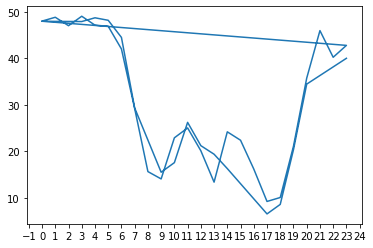

In [15]:
from matplotlib.pyplot import MultipleLocator
data_for_plotting = data.loc[(data['date_month'] == 1) & (data['date_day'] == 11)]

plt.plot(data_for_plotting["date_hour"],data_for_plotting['speed'])

ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

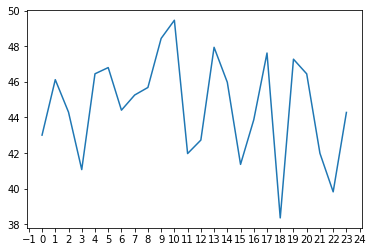

In [16]:
from matplotlib.pyplot import MultipleLocator
data_for_plotting = data[0:24]

plt.plot(data_for_plotting["date_hour"],data_for_plotting['speed'])

ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

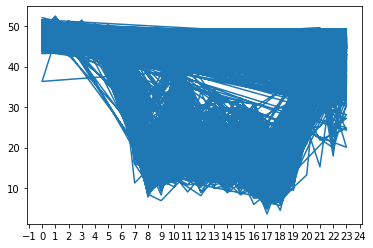

In [17]:
from matplotlib.pyplot import MultipleLocator
data_for_plotting = data[data['date_isWorkingday'] == 1]

plt.plot(data_for_plotting["date_hour"],data_for_plotting['speed'])

ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

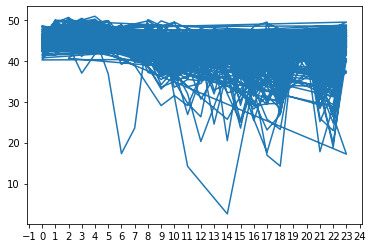

In [18]:
from matplotlib.pyplot import MultipleLocator
data_for_plotting = data[data['date_isSunday'] == 1]

plt.plot(data_for_plotting["date_hour"],data_for_plotting['speed'])

ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

0 47.44683333692572
1 48.35522867561311
2 47.38061851828715
3 48.03479862327678
4 47.340104654290556
5 46.844629442730394
6 45.00319442803108
7 31.999251719173877
8 21.175191282789577
9 22.307378221927344
10 26.96293932336177
11 26.169239122863427
12 22.301472367373286
13 22.830296429098286
14 21.106631138795393
15 21.606209456793394
16 20.895633707128173
17 17.762564900661058
18 15.901330722381436
19 26.338357823824214
20 38.118820493565494
21 42.228976509123115
22 37.15296626032368
23 41.52731785284976


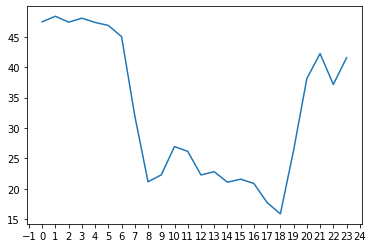

In [19]:
speed_average_list = []
for i in range(0,24):
  data_for_means = data[data['date_hour'] == i]
  speed_average = data_for_means['speed'].mean()
  print(i, speed_average)
  speed_average_list.append(speed_average)

plt.plot(range(0,24), speed_average_list)

ax=plt.gca()
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

In [20]:
data_for_means = data[data['date_isSunday'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isSaturday'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isWorkingday'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

42.2983456971446
33.49869198599605
30.69627626338484


In [21]:
data_for_means = data[data['date_isSpring'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isSummer'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isAutumn'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isWinter'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

33.11364618649819
32.5521469535954
32.090586284161496
33.357931317854415


In [22]:
data_for_means = data[data['date_isMorning'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isNight'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

22.117139130847995
43.42892333838725


In [23]:
data_for_means = data[data['date_isAtEarly'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isAtMiddle'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

data_for_means = data[data['date_isAtTheEnd'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

33.2614153852792
32.39621128682143
32.67921340639729


In [24]:
data_for_means = data[data['date_isBusy'] == 1]
speed_average = data_for_means['speed'].mean()
print(speed_average)

16.840659971504685


In [25]:
# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','date_isSpring','date_isSummer','date_isAutumn','date_isWinter','date_isAtEarly','date_isAtMiddle','date_isAtTheEnd','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour']]
# mse: 17.829, while 15.572 using rf model directly.

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight']]
# mse: 21.81, without speed of last three hour

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour']]
# mse: 15.407, add just one hour

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour']]
# mse: 14.91 using rf model directly, it seems sliding windows are useful

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour']]
# mse: 15.46 using rf model directly, not good as previours one, last 7 hours, but seems stable

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour']]
# mse: 16.05 using rf model directly, not good as previours one, last 5 hours

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour']]
# mse: 13.93, 15.64 using rf model directly, not good as previours one, last 10 hours, but seems stable
# the model will shake, but this input has the highest limit.

# delete weekday
# X = data[['date_year','date_month','date_day','date_hour','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour']]
# mse: around 16
# the model will shake, but this input has the highest limit.

# let's try previous directly
# X = data[['speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour']]
# mse: 39, no good

# combine a little
# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour']]
# mse: 15.8804


# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight']]
# mse: 19.79

# X = data[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','date_isSpring','date_isSummer','date_isAutumn','date_isWinter','date_isAtEarly','date_isAtMiddle','date_isAtTheEnd']]
# mse：20

data_2017 = data[data['date_year'] == 2017]
# X = data_2017[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour']]
X = data_2017[['date_year','date_month','date_day','date_hour','date_weekday','date_isSunday','date_isSaturday','date_isWorkingday','date_isBusy','date_isMorning','date_isNight','date_isHoliday','speed_for_last_1_hour','speed_for_last_2_hour','speed_for_last_3_hour','speed_for_last_4_hour','speed_for_last_5_hour','speed_for_last_6_hour','speed_for_last_7_hour','speed_for_last_8_hour','speed_for_last_9_hour','speed_for_last_10_hour','speed_for_last_11_hour','speed_for_last_12_hour','speed_for_last_13_hour','speed_for_last_14_hour','speed_for_last_15_hour','speed_for_last_16_hour','speed_for_last_17_hour','speed_for_last_18_hour','speed_for_last_19_hour','speed_for_last_20_hour','speed_for_last_21_hour','speed_for_last_22_hour','speed_for_last_23_hour','speed_for_last_24_hour']]
Y = data_2017['speed']
# mse: 12.24, 14.57, 13.32
# using past 24 hours: 12.094, 12.199, 12.980
# the model will shake, but this input has the highest limit.
#Y = data['speed']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.01)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_RF = RandomForestRegressor()

model_RF.fit(X_train,y_train)
y_pred = model_RF.predict(X_test)

print(y_pred)

from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test, y_pred)
print(mse)

[20.13123424 24.64941794 19.53257707 46.88721777 19.7406418  35.9893488
 23.33402853 47.16852839 44.21597246 46.76323811 20.134829   39.54497621
 19.13173399 16.55951464 29.07374882 25.1726082  46.36976496 36.04560281
 16.3902377  17.7867754  46.80781225 14.15873179 45.52691632 25.75268429
 39.48587457 47.05876089 34.37579615 17.37128592 15.87870775 46.19968159
 26.51414506 37.44721222 10.87416725 47.90279814 39.2919031  21.68526838
 10.26047774 47.41997863 45.70190095 43.32600111 44.37820773 48.45982175
 33.52762905 48.00731211 48.10785691 17.61197501 19.31846622 46.70798592
 41.85134276 32.86531076 41.75704744 16.16229042 17.4089972  22.42251922
 26.95608319 20.8738031  18.63578438 39.81208758 35.51412547 47.26552029
 37.49060156 16.86878599 43.82357401 47.4874507  14.3170573  38.2930798
  9.2042767  44.04652047 20.79003366 18.31650073 47.96869278 48.873036
 23.19471365 18.88555492 48.55789261 19.63431194 20.33696615 13.47003402
 22.89559993 10.14784237 47.93129125 44.08056286 23.045

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_RF = RandomForestRegressor()
param_gs = {'n_estimators':[10,50,100,200,300,500,1000,5000],
        'max_features':[1,2,3,4]
        }

GS_RF = GridSearchCV(estimator = model_RF, param_grid = param_gs, n_jobs = 2)
GS_RF.fit(X_train,y_train)
y_pred = GS_RF.predict(X_test)

print(GS_RF.best_params_)
print(y_pred)

from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test, y_pred)
print(mse)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


# XGB Regressor

In [ ]:
# don't do it directly may be better

from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV

model_XGB = XGBRegressor()

param_gs = {'n_estimators':[10,50,100,500,1000],
        'nthread':[1,2,3,4],
        'learning_rate':[0.001,0.01,0.05,0.1,1]
        }

model_XGB_randomizedSearch = RandomizedSearchCV(model_XGB, param_gs, cv = 10, n_jobs = -1, verbose = True, scoring = 'neg_mean_squared_error')


model_XGB_randomizedSearch.fit(X_train, y_train)
y_prediction = model_XGB_randomizedSearch.predict(X_test)
mse = mse(y_test, y_prediction)
print(mse)

In [ ]:
model_XGB_randomizedSearch.best_params_

In [ ]:
print(y_prediction)